In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-minrescg-converge)

We will compare MINRES and CG on some quasi-random SPD problems.  The first matrix has a condition number of 100.

In [2]:
n = 5000
density = 0.001
A = FNC.sprandsym(n, density, rcond=1e-2)
x = arange(1, n+1) / n
b = A @ x 

```{index} ! Python; cg, Python; minres
```

Now we apply both methods and compare the convergence of the system residuals, using implementations imported from `scipy.sparse.linalg`.

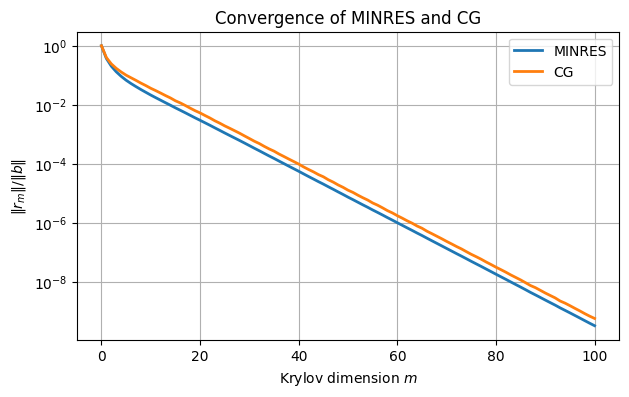

In [3]:
from scipy.sparse.linalg import cg, minres
hist = lambda x: resid.append(norm(b - A @ x))

resid = [norm(b)]
xMR, flag = minres(A, b, rtol=1e-12, maxiter=100, callback=hist)
semilogy(resid / norm(b), label="MINRES")

resid = [norm(b)]
xCG, flag = cg(A, b, rtol=1e-12, maxiter=100, callback=hist)
semilogy(resid / norm(b), label="CG")

xlabel("Krylov dimension $m$"), ylabel("$\\|r_m\\| / \\|b\\|$")
grid(),  legend(),  title("Convergence of MINRES and CG");

There is little difference between the two methods here. Both achieve relative residual of $10^{-6}$ in aout 60 iterations, for example. The final errors are similar, too.

In [4]:
print(f"MINRES error: {norm(xMR - x) / norm(x):.2e}")
print(f"CG error: {norm(xCG - x) / norm(x):.2e}")

MINRES error: 4.73e-09
CG error: 3.01e-09


Next, we increase the condition number of the matrix by a factor of 25. The rule of thumb predicts that the number of iterations required should increase by a factor of about 5; i.e., 300 iterations to reach $10^{-6}$.

In [5]:
A = FNC.sprandsym(n, density, rcond=1e-2 / 25)
x = arange(1, n+1) / n
b = A @ x 

MINRES error: 1.61e-04
CG error: 1.52e-05


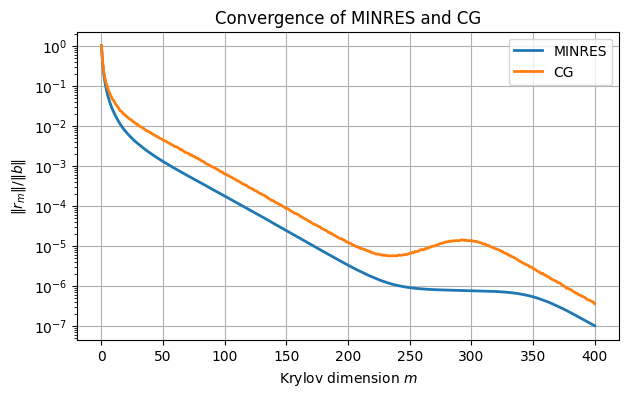

In [6]:
from scipy.sparse.linalg import cg, minres
hist = lambda x: resid.append(norm(b - A @ x))

resid = [norm(b)]
xMR, flag = minres(A, b, rtol=1e-12, maxiter=400, callback=hist)
semilogy(resid / norm(b), label="MINRES")

resid = [norm(b)]
xCG, flag = cg(A, b, rtol=1e-12, maxiter=400, callback=hist)
semilogy(resid / norm(b), label="CG")

xlabel("Krylov dimension $m$"), ylabel("$\\|r_m\\| / \\|b\\|$")
grid(),  legend(),  title("Convergence of MINRES and CG")

print(f"MINRES error: {norm(xMR - x) / norm(x):.2e}")
print(f"CG error: {norm(xCG - x) / norm(x):.2e}")

Both methods have an early superlinear phase that allow them to finish slightly sooner than the factor of 5 predicted: {numref}`Theorem {number} <theorem-minrescg-converge>` is an upper bound, not necessarily an approximation.